In [4]:
# Importing essential libraries
import os  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Importing machine learning tools from Scikit-learn
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor  

# Importing XGBoost library for regression
from xgboost import XGBRegressor  

In [5]:
# Create file path
file_path = os.path.join(os.getcwd(), '002 crop_yield.csv')

# Load CSV file
data = pd.read_csv(file_path)

# Preview data
data.head(2)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341


In [6]:
# Check for missing values in each column
data.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
# Get  information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [8]:
# Get the data types of all columns 
column_types = data.dtypes

# Extract columns with 'float64' data type 
numeric_columns = column_types[column_types == 'float64'].index.tolist()

# Extract columns with 'int64' data type 
integer_columns = column_types[column_types == 'int64'].index.tolist()

# Extract columns with 'object' data type (categorical or string columns)
object_columns = column_types[column_types == 'object'].index.tolist()

# Print the results
print("Numeric columns (float64):", numeric_columns)
print("Integer columns (int64):", integer_columns)
print("Object columns (Categorical/String):", object_columns)

Numeric columns (float64): ['Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare']
Integer columns (int64): ['Days_to_Harvest']
Object columns (Categorical/String): ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,1000000.0,549.981901,259.851320,100.000896,324.891090,550.124061,774.738520,999.998098
Temperature_Celsius,1000000.0,27.504965,7.220608,15.000034,21.254502,27.507365,33.753267,39.999997
Days_to_Harvest,1000000.0,104.495025,25.953412,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,1000000.0,4.649472,1.696572,-1.147613,3.417637,4.651808,5.879200,9.963372


In [13]:
data.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [14]:
data.shape

(1000000, 10)

### label incoder in features

In [15]:
'Region', 'Soil_Type', 'Crop', 'Weather_Condition'

('Region', 'Soil_Type', 'Crop', 'Weather_Condition')

In [16]:
lbl = LabelEncoder()

In [17]:
# Convert categorical values to numeric labels for easier processing
data['Region'] = lbl.fit_transform(data['Region'])
data['Soil_Type'] = lbl.fit_transform(data['Soil_Type'])
data['Crop'] = lbl.fit_transform(data['Crop'])
data['Weather_Condition'] = lbl.fit_transform(data['Weather_Condition'])



In [18]:
# Count unique values in each column
unique_values_per_column = data.nunique()

# Print the number of unique values for each column
print("Number of unique values in each column:")
print(unique_values_per_column)


Number of unique values in each column:
Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64


### visualisation data

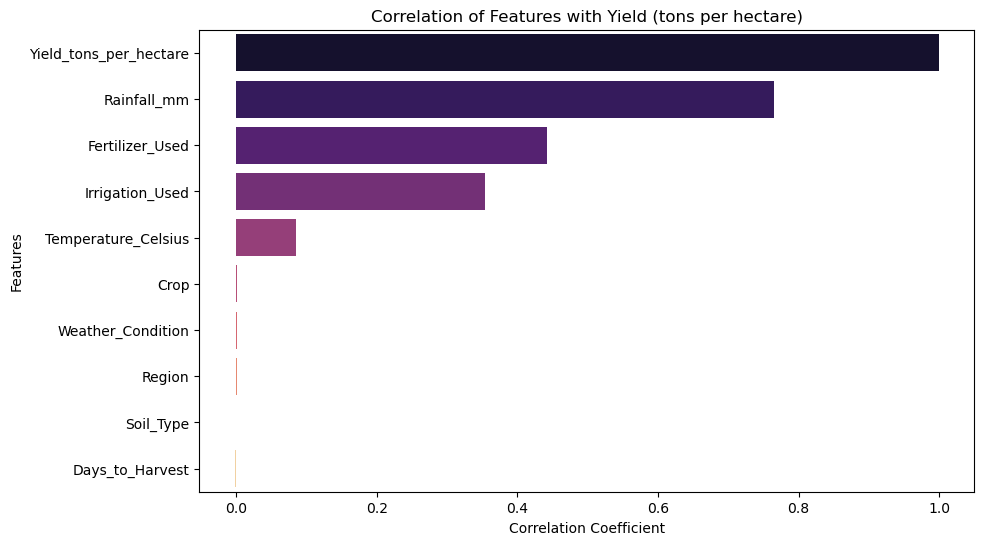

In [19]:
# Calculate correlation of each feature with the target 
corr_with_price = data.corr()['Yield_tons_per_hectare'].sort_values(ascending=False)

# Plot the correlation coefficients using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='magma')

# Add titles and labels to the plot
plt.title('Correlation of Features with Yield (tons per hectare)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


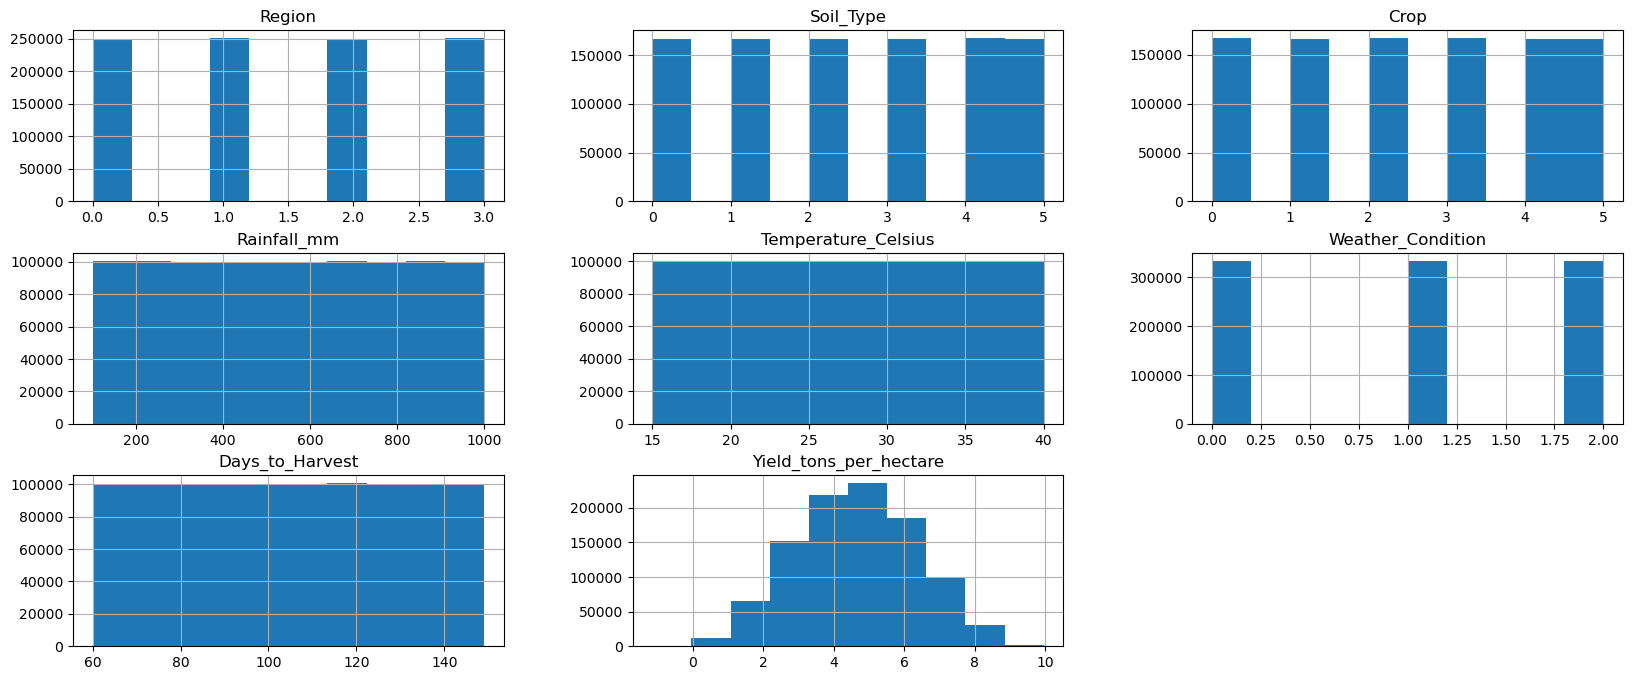

In [20]:
# Histogram Distribution of Numerical Variables in Dataset
data.hist(bins=10, figsize=(20,8))
plt.show()

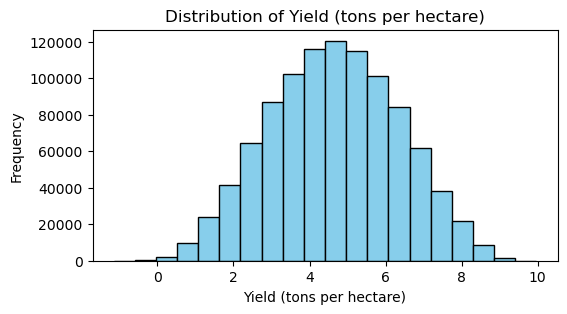

In [23]:
# Plot the distribution of 'Yield_tons_per_hectare'
plt.figure(figsize=(6, 3))
plt.hist(data['Yield_tons_per_hectare'], bins=20, color='skyblue', edgecolor='black')

# Add titles and labels to the plot
plt.title('Distribution of Yield (tons per hectare)')
plt.xlabel('Yield (tons per hectare)')
plt.ylabel('Frequency')
plt.show()


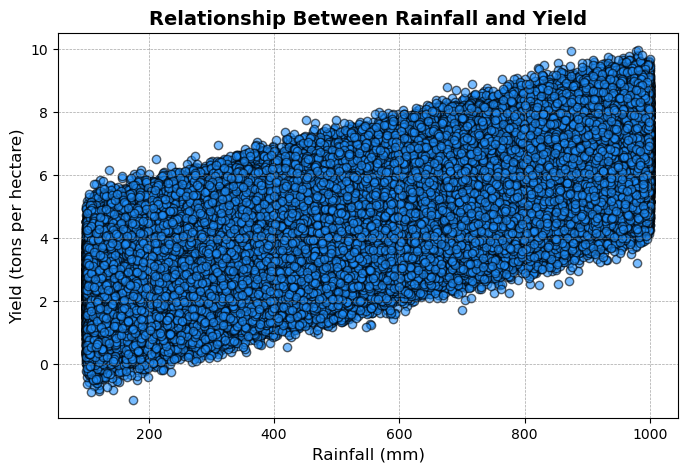

In [26]:
# Scatter plot: Relationship between Rainfall and Yield
plt.figure(figsize=(8, 5))  # Adjusted figure size for better visibility
plt.scatter(data['Rainfall_mm'], data['Yield_tons_per_hectare'], color='dodgerblue', alpha=0.6, edgecolor='black')

# Titles and axis labels for clarity
plt.title('Relationship Between Rainfall and Yield', fontsize=14, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Yield (tons per hectare)', fontsize=12)

# Adding a grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


C:\Users\MHMD RAGAB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


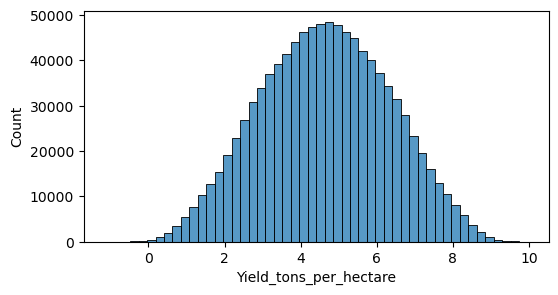

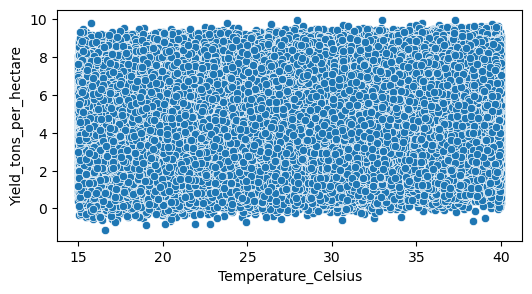

In [28]:
# Plot histogram for yield distribution
plt.figure(figsize=(6, 3))
sns.histplot(data['Yield_tons_per_hectare'], bins=50)
plt.show()

# Plot scatter plot for temperature vs yield
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Temperature_Celsius', y='Yield_tons_per_hectare', data=data)
plt.show()

C:\Users\MHMD RAGAB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


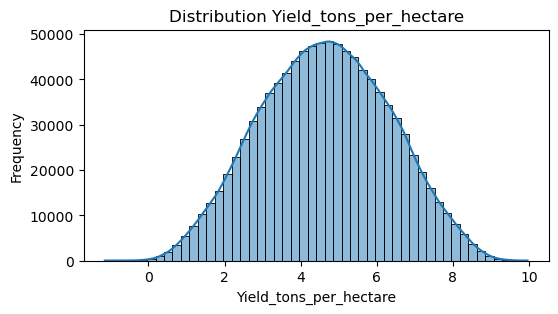

In [31]:
# Plot distribution of yield (tons per hectare)
plt.figure(figsize=(6, 3))
sns.histplot(data['Yield_tons_per_hectare'], bins=50, kde=True)
plt.title('Distribution Yield_tons_per_hectare')
plt.xlabel('Yield_tons_per_hectare')
plt.ylabel('Frequency')
plt.show()

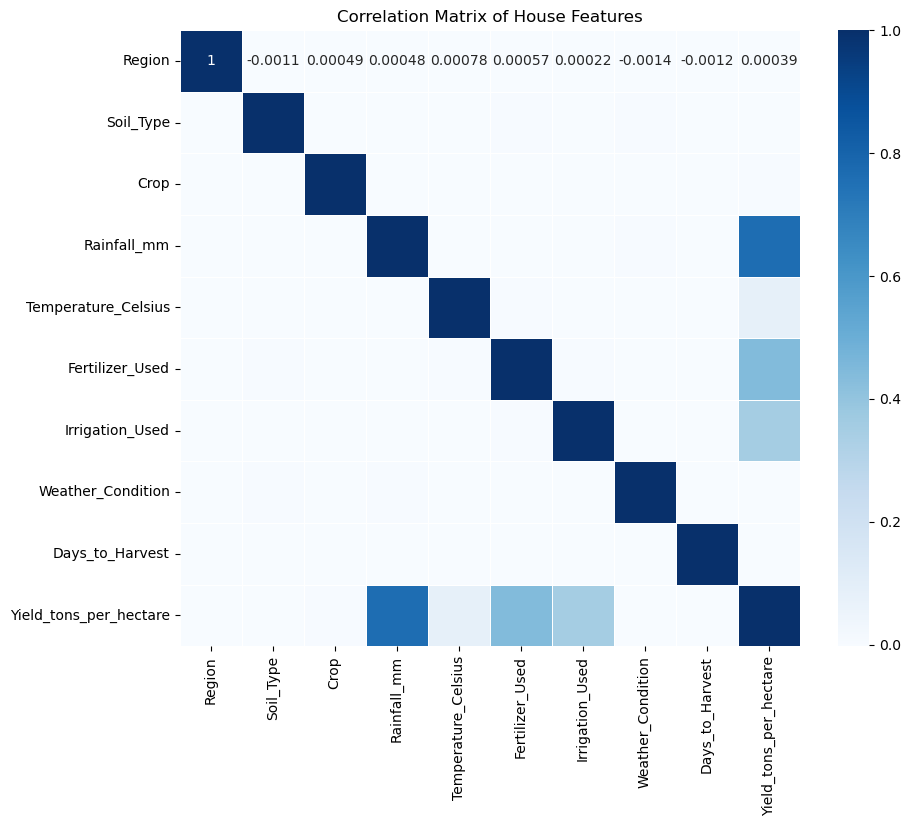

In [35]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.4)
plt.title('Correlation Matrix of House Features')
plt.show()

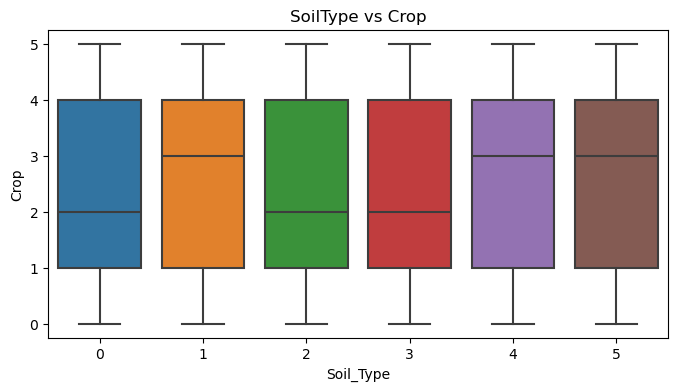

In [37]:
# Plot boxplot to compare Crop yield across Soil Types
plt.figure(figsize=(8, 4))
sns.boxplot(x='Soil_Type', y='Crop', data=data)
plt.title('SoilType vs Crop')
plt.show()

### feature engenering

In [38]:
data.corr()['Yield_tons_per_hectare'].sort_values(ascending=False)

Yield_tons_per_hectare    1.000000
Rainfall_mm               0.764618
Fertilizer_Used           0.442099
Irrigation_Used           0.353741
Temperature_Celsius       0.085565
Crop                      0.001283
Weather_Condition         0.001132
Region                    0.000390
Soil_Type                -0.000333
Days_to_Harvest          -0.002591
Name: Yield_tons_per_hectare, dtype: float64

In [39]:
data.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [40]:
data['Rainfall_Fertilizer_Sum'] = data['Rainfall_mm'] + data['Fertilizer_Used']
data['Temp_Fertilizer_Rainfall_Interaction'] = data['Temperature_Celsius'] * data['Rainfall_Fertilizer_Sum']

data['Rainfall_Temperature_Fertilizer_Ratio'] = data['Rainfall_mm'] / data['Temperature_Celsius'] - data['Fertilizer_Used']

data['Price_Region_Weather_Interaction'] = data['Weather_Condition'] - data['Region'] * data['Temperature_Celsius']

data['Harvest_Duration_Soil_Interaction'] = data['Days_to_Harvest'] / data['Temperature_Celsius'] - data['Soil_Type']


In [42]:
# Correlation of columns with 'Yield_tons_per_hectare'
data.corr()['Yield_tons_per_hectare'].sort_values(ascending=False)


Yield_tons_per_hectare                   1.000000
Rainfall_Fertilizer_Sum                  0.765469
Rainfall_mm                              0.764618
Temp_Fertilizer_Rainfall_Interaction     0.692360
Rainfall_Temperature_Fertilizer_Ratio    0.573929
Fertilizer_Used                          0.442099
Irrigation_Used                          0.353741
Temperature_Celsius                      0.085565
Crop                                     0.001283
Weather_Condition                        0.001132
Region                                   0.000390
Soil_Type                               -0.000333
Days_to_Harvest                         -0.002591
Price_Region_Weather_Interaction        -0.028226
Harvest_Duration_Soil_Interaction       -0.042808
Name: Yield_tons_per_hectare, dtype: float64

In [43]:
data.head(4)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_Fertilizer_Sum,Temp_Fertilizer_Rainfall_Interaction,Rainfall_Temperature_Fertilizer_Ratio,Price_Region_Weather_Interaction,Harvest_Duration_Soil_Interaction
0,3,4,1,897.077239,27.676966,False,True,0,122,6.555816,897.077239,24828.376581,32.412412,-83.030899,0.407998
1,2,1,3,992.673282,18.026142,True,True,1,140,8.527341,993.673282,17912.095929,54.068537,-35.052285,6.766498
2,1,2,0,147.998025,29.794042,False,False,2,106,1.127443,147.998025,4409.459443,4.967370,-27.794042,1.557758
3,1,4,4,986.866331,16.644190,False,True,1,146,6.517573,986.866331,16425.590912,59.291940,-15.644190,4.771830


### model training

In [44]:
# Separate features (X) and target (y)
X = data.drop('Yield_tons_per_hectare', axis=1)  # Features
y = data['Yield_tons_per_hectare']  # Target

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train a Linear Regression model
len_reg = LinearRegression()
len_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict on the test set
y_pred = len_reg.predict(X_test)

In [48]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R² Score

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.2507730930156785
R² Score: 0.9130150111576407


In [49]:
# Train a Random Forest Regression model
rand_fors_reg = RandomForestRegressor(n_estimators=5, random_state=42)
rand_fors_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [50]:
# Make predictions using the random forest model
y_pred_forest = rand_fors_reg.predict(X_test)


In [51]:
# Calculate  Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred_forest)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.2507730930156785
R² Score: 0.8901784717134132


In [52]:
# Train a K-Nearest Neighbors (KNN) Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
# Predict on the test set using the KNN model
y_pred_knn = knn_model.predict(X_test)

In [54]:
# Calculate performance metrics for KNN model: MSE and R² Score
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1.4039244293697557
R² Score: 0.5130245061155393


In [55]:
# Initialize and train the XGBoost regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.1 ,  max_depth = 5)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
# Make predictions using the trained XGBoost model
y_pred_xgboost = xgb_model.predict(X_test)


In [57]:
# Calculate performance metrics for XGBoost model: MSE and R² Score
mse = mean_squared_error(y_test, y_pred_xgboost)
r2 = r2_score(y_test, y_pred_xgboost)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.2515538730302197
R² Score: 0.9127441840922786


In [58]:
# Calculate and store MSE for both training and test sets
train_scores = []
test_scores = []

# Predict on the training data and calculate the MSE
y_train_pred = xgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_scores.append(train_mse)

# Predict on the test data and calculate the MSE
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_scores.append(test_mse)


In [59]:
print(train_scores)
print(test_scores)


[0.2503617180858209]
[0.2515538730302197]
